**Decision Trees and Random Forests in Python**

Import Liberies


In [1]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

In [3]:
df = pd.read_csv('/content/kyphosis.csv')


In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


**EDA**

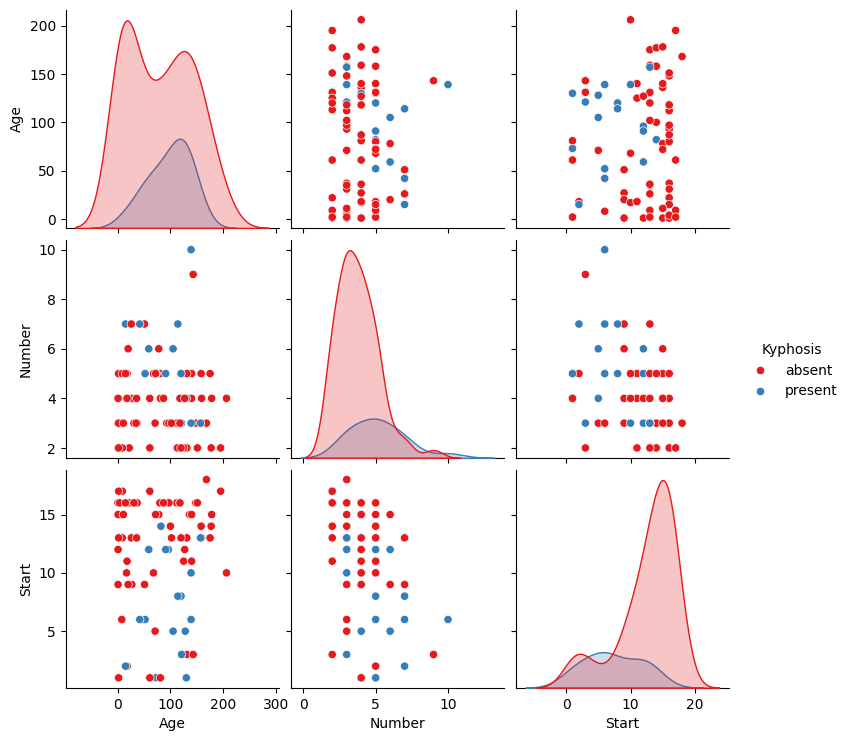

In [5]:
sns.pairplot(df,hue = 'Kyphosis',palette='Set1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


**Train_test_split**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [10]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [11]:
y.head()

,Kyphosis
0,absent
1,absent
2,present
3,absent
4,absent


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [14]:
x_test.shape

(17, 3)

In [15]:
x_train.shape

(64, 3)

Decision Trees Apply

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

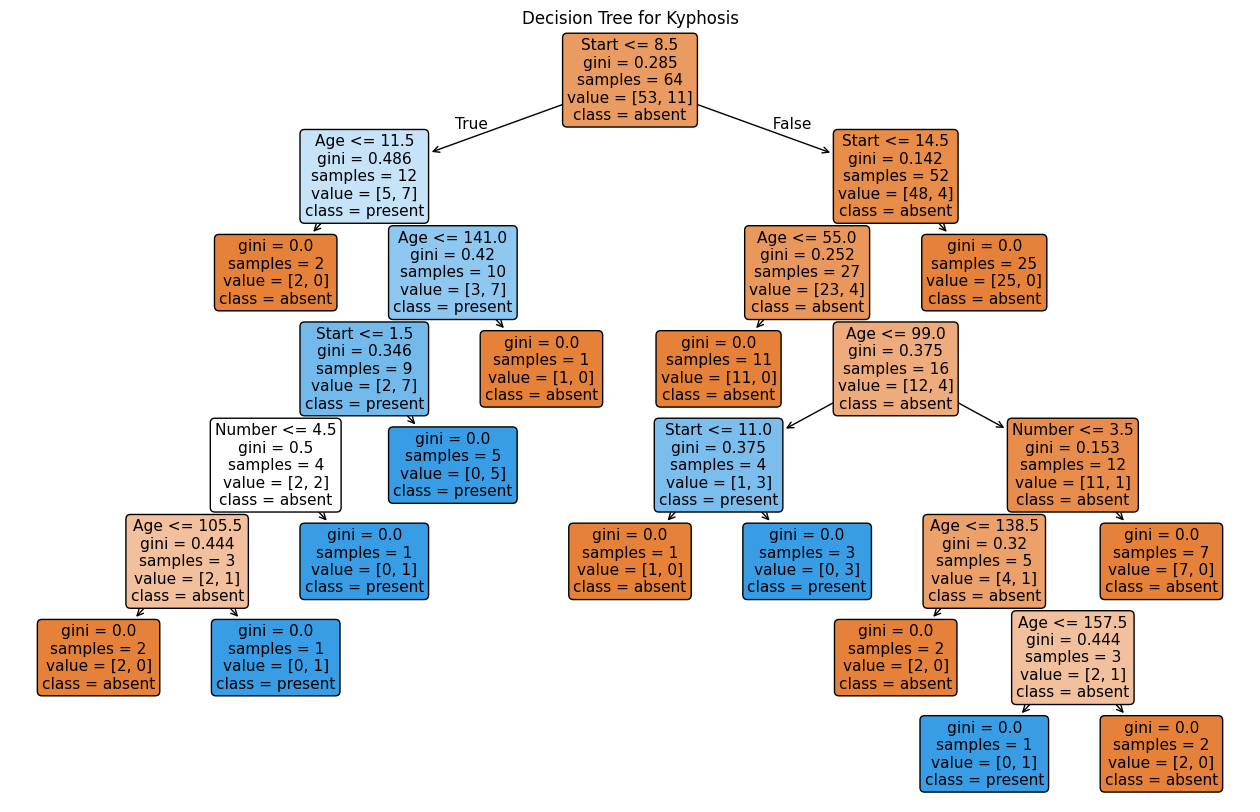

In [21]:
from sklearn.tree import plot_tree # Import plot_tree from sklearn.tree

plt.figure(figsize=(16,10))
plot_tree(dtree, feature_names=dtree.feature_names_in_, class_names=dtree.classes_, filled=True, rounded=True)
plt.title('Decision Tree for Kyphosis')
plt.show()

**Prediction and Evaluation**

In [23]:
prediction = dtree.predict(x_test)
prediction

array(['present', 'present', 'absent', 'present', 'absent', 'present',
       'present', 'absent', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'present'], dtype=object)

In [25]:
y_test

,Kyphosis
61,present
0,absent
27,absent
45,present
73,absent
21,present
39,present
54,absent
56,absent
12,absent


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       1.00      0.73      0.84        11
     present       0.67      1.00      0.80         6

    accuracy                           0.82        17
   macro avg       0.83      0.86      0.82        17
weighted avg       0.88      0.82      0.83        17



In [28]:
print(confusion_matrix(y_test,prediction))

[[8 3]
 [0 6]]


In [30]:
((8+6)/(8+3+0+6))*100      # confusion_matrix

82.35294117647058

**Random Forests**

let's to compare a decision tree to random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [32]:
rfc_pred = rfc.predict(x_test)

In [33]:
rfc_pred

array(['present', 'present', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'present'], dtype=object)

In [35]:
prediction = dtree.predict(x_test)
prediction

array(['present', 'present', 'absent', 'present', 'absent', 'present',
       'present', 'absent', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'present'], dtype=object)

In [34]:
y_test

,Kyphosis
61,present
0,absent
27,absent
45,present
73,absent
21,present
39,present
54,absent
56,absent
12,absent


In [36]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      0.82      0.82        11
     present       0.67      0.67      0.67         6

    accuracy                           0.76        17
   macro avg       0.74      0.74      0.74        17
weighted avg       0.76      0.76      0.76        17



In [37]:
print(confusion_matrix(y_test,rfc_pred))

[[9 2]
 [2 4]]


In [38]:
((9+4)/(9+4+2+2))*100

76.47058823529412

In [41]:
rfc.score(x_test,y_test)

0.7647058823529411

In [43]:
dtree.score(x_test,y_test)

0.8235294117647058